In [2]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

In [3]:
# Set up the data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory('C:/Users/Abd ur Rehman/Desktop/Train', target_size=(224, 224), batch_size=32)
test_generator = test_datagen.flow_from_directory('C:/Users/Abd ur Rehman/Desktop/Test', target_size=(224, 224), batch_size=32)

Found 40 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [5]:
# Load the MobileNet model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

In [6]:
# Fine-tune the top 20 layers of the pre-trained model
for layer in base_model.layers[:-20]:
    layer.trainable = False

In [7]:
# Add new classification layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x) # Add dropout regularization
predictions = Dense(1, activation='sigmoid')(x)

In [8]:
regularizer = regularizers.l2(0.01)
model = tf.keras.Sequential([
    # Add layers to the model with kernel_regularizer=regularizer
    Dense(128, activation='relu', kernel_regularizer=regularizer),
    Dense(64, activation='relu', kernel_regularizer=regularizer),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizer)
])

In [9]:
# Combine the base model and new layers into a single model
model = Model(inputs=base_model.input, outputs=predictions)

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# Train the model
model.fit(train_generator, epochs=2, validation_data=test_generator)

Epoch 1/2
2/2 [==============================] - 9s 7s/step - loss: 2.2423 - accuracy: 0.5000 - val_loss: 3.7074 - val_accuracy: 0.5000
Epoch 2/2
2/2 [==============================] - 8s 2s/step - loss: 2.3056 - accuracy: 0.5000 - val_loss: 3.7366 - val_accuracy: 0.5000


1/1 [==============================] - 0s 141ms/step
The image is Female


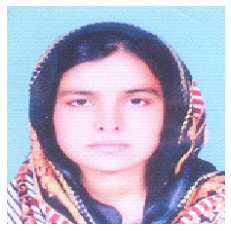

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load an image
img = image.load_img('C:/Users/Abd ur Rehman/Desktop/Train/Female/22-ENG-12.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

# Make a prediction using the trained model
prediction = model.predict(x)

# Print the prediction
if prediction < 0.5:
    print('The image is Female')
else:
    print('The image is Male')

# Show the image with predicted label
plt.imshow(img)
plt.axis('off')
plt.show()